
## In this exercise, we will use the HR dataset and understand the following using caret package:

> 1. Building the logistic regression model
2. What is marked as the positive class by the model when using caret package
3. Writing the model equation and interpreting the model summary
4. Creating the Confusion Matrix and ROC plot on train data
5. Using mis-classification cost as a criteria to select the best cut-off
6. Using Younden Index as the criteria to select the best cut-off
7. Creating the Confusion Matrix and ROC plot on test data
8. Compare and discuss the result of logistic regression using caret vis-a-via stats package
9. Changing the base or reference category and evaluate the impact on the model (This is self work/assignment)
10. Change the cut-off value for train data in caret package (This is self work/assignment)

There are bugs/missing code in the entire exercise. The participants are expected to work upon them.
***
***

## Here are some useful links:

> 1. **[Read](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/dummy.htm)** about interaction variable coding
2. Refer **[link](http://www.statmethods.net/input/valuelabels.html)** to know about adding lables to factors
3. Refer **[link](http://stackoverflow.com/questions/2342472/recode-relevel-data-frame-factors-with-different-levels)** to relvel factor variables
4. **[Read](http://stats.stackexchange.com/questions/88485/variable-is-significant-through-stepwise-regression-but-not-in-final-models-sum)** about the issues in stepwise regression
5. **[Read](http://topepo.github.io/caret/training.html)** about the modelling activity via caret package
6. The **[complete](http://topepo.github.io/caret/available-models.html)** list of tuning parameter for different models in caret package

***

# Code starts here
We are going to use below mentioned libraries for demonstrating logistic regression:



In [1]:
library(caret)    #for data partition. Model building
#library(Deducer)  #for ROC plot
library(ROCR)     #for ROC plot (other way)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess




## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



In [2]:
raw_df <- read.csv("/Users/Rahul/Documents/Datasets/IMB533_HR_Data_No_Missing_Value.csv", header = TRUE,sep = ",",na.strings = c(""," ", "NA"))


Note that `echo = FALSE` parameter prevents printing the R code that generated the
plot.

### 2. Structure and Summary of the dataset



In [3]:
str(raw_df)
summary(raw_df)

'data.frame':	8995 obs. of  18 variables:
 $ SLNO                       : int  1 2 3 4 5 6 7 9 11 12 ...
 $ Candidate.Ref              : int  2110407 2112635 2112838 2115021 2115125 2117167 2119124 2127572 2138169 2143362 ...
 $ DOJ.Extended               : Factor w/ 2 levels "No","Yes": 2 1 1 1 2 2 2 2 1 1 ...
 $ Duration.to.accept.offer   : int  14 18 3 26 1 17 37 16 1 6 ...
 $ Notice.period              : int  30 30 45 30 120 30 30 0 30 30 ...
 $ Offered.band               : Factor w/ 4 levels "E0","E1","E2",..: 3 3 3 3 3 2 3 2 2 2 ...
 $ Pecent.hike.expected.in.CTC: num  -20.8 50 42.8 42.8 42.6 ...
 $ Percent.hike.offered.in.CTC: num  13.2 320 42.8 42.8 42.6 ...
 $ Percent.difference.CTC     : num  42.9 180 0 0 0 ...
 $ Joining.Bonus              : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Candidate.relocate.actual  : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 2 1 1 2 ...
 $ 

      SLNO       Candidate.Ref     DOJ.Extended Duration.to.accept.offer
 Min.   :    1   Min.   :2109586   No :4788     Min.   :  0.00          
 1st Qu.: 3208   1st Qu.:2386476   Yes:4207     1st Qu.:  3.00          
 Median : 5976   Median :2807482                Median : 10.00          
 Mean   : 5971   Mean   :2843647                Mean   : 21.43          
 3rd Qu.: 8739   3rd Qu.:3300060                3rd Qu.: 33.00          
 Max.   :12333   Max.   :3836076                Max.   :224.00          
                                                                        
 Notice.period    Offered.band Pecent.hike.expected.in.CTC
 Min.   :  0.00   E0: 211      Min.   :-68.83             
 1st Qu.: 30.00   E1:5568      1st Qu.: 27.27             
 Median : 30.00   E2:2711      Median : 40.00             
 Mean   : 39.29   E3: 505      Mean   : 43.86             
 3rd Qu.: 60.00                3rd Qu.: 53.85             
 Max.   :120.00                Max.   :359.77             
   



Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed.



In [4]:
filter_df <- na.omit(raw_df) # listwise deletion of missing


### 3. Create train and test dataset

#### Reserve 80% for **_training_** and 20% of **_test_**

_Correct the error in the below code chunk_


In [5]:
set.seed(2341)
trainIndex <- createDataPartition(filter_df$Status, p = 0.80, list = FALSE)
train_df <- filter_df[trainIndex,]
test_df <- filter_df[-trainIndex,]


We can pull the specific attribute needed to build the model is another data frame. This agian is more of a hygine practice to not touch the **train** and **test** data set directly.

_Correct the error in the below code chunk_


In [6]:
lg_train_df <- as.data.frame(train_df[,c("DOJ.Extended",
                                             "Duration.to.accept.offer",
                                             "Notice.period",
                                             "Offered.band",
                                             "Percent.difference.CTC",
                                             "Joining.Bonus",
                                             "Gender",
                                             "Candidate.Source",
                                             "Rex.in.Yrs",
                                             "LOB",
                                             "Location",
                                             "Age",
                                             "Status"
)])


_Correct the error in the below code chunk_


In [7]:
lg_test_df <- as.data.frame(test_df[,c("DOJ.Extended",
                                           "Duration.to.accept.offer",
                                           "Notice.period",
                                           "Offered.band",
                                           "Percent.difference.CTC",
                                           "Joining.Bonus",
                                           "Gender",
                                           "Candidate.Source",
                                           "Rex.in.Yrs",
                                           "LOB",
                                           "Location",
                                           "Age",
                                           "Status"
)])


***

## Model Building: Using the **caret()** package
There are a number of models which can be built using caret package. To get the names of all the models possible.



In [8]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ORFlog"             
[139] "ORFpls"              "ORFridge"            "ORFsvm"             
[142] "ownn"                "pam"                 "parRF"              
[145] "PART"                "partDSA"             "pcaNNet"            
[148] "pcr"                 "pda"                 "pda2"               
[151] "penalized"           "PenalizedLDA"        "plr"                
[154] "pls"                 "plsRglm"             "polr"               
[157] "ppr"                 "PRIM"                "protoclass"         
[160] "pythonKnnReg"        "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         


To get the info on specific model:



In [9]:
getModelInfo()$glm$type

[1] "Regression"     "Classification"


The below chunk of code is standarized way of building model using caret package. Setting in the control parameters for the model.



In [10]:
set.seed(1234)
objControl <- trainControl(method = "cv", number = 2, returnResamp = 'none',
                           summaryFunction = twoClassSummary,
                           #summaryFunction = twoClassSummary, defaultSummary
                           classProbs = TRUE,
                           savePredictions = TRUE)


The search grid is basically a model fine tuning option. The paramter inside the **expan.grid()** function varies according to model. The **[complete](http://topepo.github.io/caret/available-models.html)** list of tuning paramter for different models.



In [11]:
#This parameter is for glmnet. Need not be executed if method  is glmStepAIC
#searchGrid <-  expand.grid(alpha = c(1:10)*0.1,
#                           lambda = c(1:5)/10)


The model building starts here.
> 1. **metric= "ROC"** uses ROC curve to select the best model.Accuracy, Kappa are other options. To use this change twoClassSummary to defaultSummary in **ObjControl**
2. **verbose = FALSE**: does not show the processing output on console

The factor names at times may not be consistent. R may expect **"Not.Joined"** but the actual level may be **"Not Joined"** This is corrected by using **make.names()** function to give syntactically valid names.



In [12]:
#lg_train_df$StatusFactor <- as.factor(ifelse(lg_train_df$Status == "Joined", 1,0))
set.seed(766)
levels(lg_train_df$Status) <- make.names(levels(factor(lg_train_df$Status)))
lg_caret_model <- train(lg_train_df[,1:12],
                      lg_train_df[,13],
                      method = 'glmStepAIC', #'glm', glmnet
                      trControl = objControl,
                      metric = "ROC",
                      verbose = FALSE)

Start:  AIC=3281.64
.outcome ~ DOJ.Extended + Duration.to.accept.offer + Notice.period + 
    Offered.band + Percent.difference.CTC + Joining.Bonus + Gender + 
    Candidate.Source + Rex.in.Yrs + LOB + Location + Age

                           Df Deviance    AIC
- Location                 10   3231.4 3275.4
- Gender                    1   3217.7 3279.7
- Joining.Bonus             1   3218.2 3280.2
- Duration.to.accept.offer  1   3218.3 3280.3
<none>                          3217.6 3281.6
- DOJ.Extended              1   3221.8 3283.8
- Rex.in.Yrs                1   3223.2 3285.2
- LOB                       8   3238.5 3286.5
- Percent.difference.CTC    1   3226.2 3288.2
- Offered.band              3   3230.3 3288.3
- Age                       1   3230.0 3292.0
- Candidate.Source          2   3243.8 3303.8
- Notice.period             1   3313.3 3375.3

Step:  AIC=3275.43
.outcome ~ DOJ.Extended + Duration.to.accept.offer + Notice.period + 
    Offered.band + Percent.difference.CTC + Join

                           Df Deviance    AIC
- Joining.Bonus             1   6440.0 6502.0
- Gender                    1   6440.5 6502.5
- Duration.to.accept.offer  1   6441.3 6503.3
<none>                          6440.0 6504.0
- Location                 10   6462.9 6506.9
- Rex.in.Yrs                1   6445.3 6507.3
- Percent.difference.CTC    1   6445.9 6507.9
- DOJ.Extended              1   6446.5 6508.5
- Age                       1   6459.2 6521.2
- Offered.band              3   6471.9 6529.9
- LOB                       8   6484.0 6532.0
- Candidate.Source          2   6493.7 6553.7
- Notice.period             1   6641.5 6703.5

Step:  AIC=6501.97
.outcome ~ DOJ.Extended + Duration.to.accept.offer + Notice.period + 
    Offered.band + Percent.difference.CTC + Gender + Candidate.Source + 
    Rex.in.Yrs + LOB + Location + Age

                           Df Deviance    AIC
- Gender                    1   6440.6 6500.6
- Duration.to.accept.offer  1   6441.3 6501.3
<none>          



## Model Evaluation

### 1. One useful plot from caret package is the variable importance plot

In case you get an error "Invalid Graphic state", uncomment the line below


In [13]:
lg_caret_model
summary(lg_caret_model$finalModel)

#dev.off()
#plot(varImp(lg_caret_model, scale = TRUE))

Generalized Linear Model with Stepwise Feature Selection 

7197 samples
  12 predictor
   2 classes: 'Joined', 'Not.Joined' 

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 3598, 3599 
Resampling results:

  ROC        Sens       Spec      
  0.6780952  0.9929929  0.03789004



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3563  -0.6804  -0.5317  -0.3576   2.7421  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         2.259535   1.289022   1.753  0.07962 .  
DOJ.ExtendedYes                    -0.207165   0.066462  -3.117  0.00183 ** 
Notice.period                       0.020616   0.001419  14.525  < 2e-16 ***
Offered.bandE1                     -1.192264   0.206380  -5.777 7.60e-09 ***
Offered.bandE2                     -1.065211   0.226899  -4.695 2.67e-06 ***
Offered.bandE3                     -1.223899   0.295230  -4.146 3.39e-05 ***
Percent.difference.CTC             -0.004578   0.001957  -2.339  0.01932 *  
Candidate.SourceDirect             -0.368604   0.072463  -5.087 3.64e-07 ***
Candidate.SourceEmployee Referral  -0.736148   0.107263  -6.863 6.74e-12 ***
Rex.in.Yrs                          0.050985   0.021981   2.320  0.02036 *  
LOBBFSI     



### 2. The prediction and confusion Matrix on train data.

The syntax for prediction in caret is almost similar expect the the **type** attribute expects input as **'raw'** or **'prob'**. In case of prob, the predicted value holds the probability of both positive and negative class.



In [14]:
#Missing code. May result in error
levels(lg_train_df$Status) <- make.names(levels(factor(lg_train_df$Status)))
caretPredictedClass <- predict(object = lg_caret_model, lg_train_df[,1:12], type = 'raw')
confusionMatrix(caretPredictedClass,lg_train_df$Status)

Confusion Matrix and Statistics

            Reference
Prediction   Joined Not.Joined
  Joined       5807       1294
  Not.Joined     44         52
                                         
               Accuracy : 0.8141         
                 95% CI : (0.8049, 0.823)
    No Information Rate : 0.813          
    P-Value [Acc > NIR] : 0.4115         
                                         
                  Kappa : 0.0484         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.99248        
            Specificity : 0.03863        
         Pos Pred Value : 0.81777        
         Neg Pred Value : 0.54167        
             Prevalence : 0.81298        
         Detection Rate : 0.80686        
   Detection Prevalence : 0.98666        
      Balanced Accuracy : 0.51556        
                                         
       'Positive' Class : Joined         
                                         


### 3. The optimal cut-off

Creating empty vectors to store the results.


In [15]:
msclaf_cost <- c()
youden_index <- c()
cutoff <- c()
P11 <- c() #correct classification of positive as positive
P00 <- c() #correct classification of negative as negative
P10 <- c() #misclassification of positive class to negative class
P01 <- c() #misclassification of negative class to positive class


#### Select the optimal cut-off value, if:

> 1. cost of misclassifying Not Joined as Joined is twice as costly as cost of
micalssifying Joined as Not Joined
2. both sensitivity and specificity are equally important

The best cut-off is the one which minimizes the misclassification cost (in case of **_option 1_**) or which maximizes the Youden's Index (in case of **_Option 2_**).

_fix the bug here_: clue is in the above **two options**


In [16]:
train_predicted_prob = predict(object = lg_caret_model, lg_train_df[,1:12], type = 'prob')
#variable with all the values as joined
n <- length(lg_train_df$Status)

costs = matrix(c(0,2,1, 0), ncol = 2)
colnames(costs) = rownames(costs) = c("Joined", "Non Joined")
as.table(costs)

           Joined Non Joined
Joined          0          1
Non Joined      2          0


The misclassification cost table is:



In [17]:
# defining log odds in favor of Joined
for (i in seq(0.05, 1, .05)) {
  predicted_y = rep("Not Joined", n)
  predicted_y[train_predicted_prob[1] > i] = "Joined"
  tbl <- table(lg_train_df$Status, predicted_y)
  if ( i <= 1) {
    #Classifying Not Joined as Joined
    P10[20*i] <- tbl[2]/(tbl[2] + tbl[4])

    P11[20*i] <- tbl[4]/(tbl[2] + tbl[4])

    #Classifying Joined as Not Joined
    P01[20*i] <- tbl[3]/(tbl[1] + tbl[3])

    P00[20*i] <- tbl[1]/(tbl[1] + tbl[3])

    cutoff[20*i] <- i
    msclaf_cost[20*i] <- P10[20*i]*costs[2] + P01[20*i]*costs[3]
    youden_index[20*i] <- P11[20*i] + P00[20*i] - 1
  }
}
df_cost_table <- cbind(cutoff,P10,P01,msclaf_cost, P11, P00, youden_index)


The table summarizing the optimal cut-off value:

_write the cost.table into a csv file_


In [18]:
df_cost_table
#write.csv(df_cost_table, "Optimal_Cutoff_caret.csv")

cutoff,P10,P01,msclaf_cost,P11,P00,youden_index
0.05,NA,NA,NA,NA,NA,NA
0.10,NA,NA,NA,NA,NA,NA
0.15,NA,NA,NA,NA,NA,NA
0.20,NA,NA,NA,NA,NA,NA
0.25,NA,NA,NA,NA,NA,NA
0.30,NA,NA,NA,NA,NA,NA
0.35,NA,NA,NA,NA,NA,NA
0.40,1.00000000,0.0005127329,2.0005127,0.00000000,0.99948727,-0.0005127329
0.45,0.98662704,0.0034182191,1.9766723,0.01337296,0.99658178,0.0099547378
0.50,0.96136701,0.0075200820,1.9302541,0.03863299,0.99247992,0.0311129046



### 4. Confusion Matrix on the test data

The **predict** function is used to get the predicted probability on the new dataset. The probability value along with the optimal cut-off can be used to build confusion matrix



In [19]:
test_predicted_prob = predict(lg_caret_model, lg_test_df, type = "prob")

#variable with all the values as joined
n <- length(lg_test_df$Status)
predicted_y = rep("Not Joined", n)

# defining log odds in favor of not joining
predicted_y[test_predicted_prob[1] > 0.80] = "Joined"

#add the model_precition in the data
lg_test_df$predicted_y <- predicted_y

###Create the confusionmatrix###
addmargins(table(lg_test_df$Status, lg_test_df$predicted_y))
mean(lg_test_df$predicted_y == lg_test_df$Status)

,Joined,Not Joined,Sum
Joined,953,509,1462
Not Joined,123,213,336
Sum,1076,722,1798


[1] 0.6484983



### 5. ROC Plot on the test data

ROCR package can be used to evaluate the model performace on the test data. The same package can also be used to get the model performace on the test data.



An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6877728


Slot "alpha.values":
list()


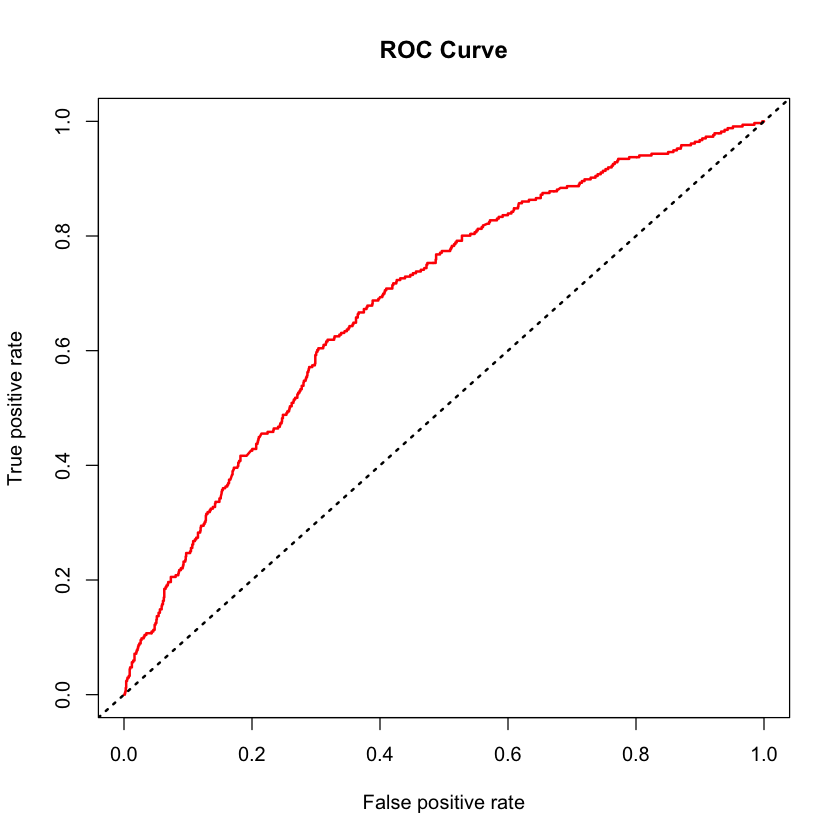

In [20]:
#error in below line
lgPredObj <- prediction(test_predicted_prob[2],lg_test_df$Status)
lgPerfObj <- performance(lgPredObj, "tpr","fpr")
plot(lgPerfObj,main = "ROC Curve",col = 2,lwd = 2)
abline(a = 0,b = 1,lwd = 2,lty = 3,col = "black")
performance(lgPredObj, "auc")


#### End of Document

***
***
